In [1]:
# Loading library and check datasets files and sizes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
%matplotlib inline

print("# File names")
for f in os.listdir("data/"):
    if 'zip' not in f:
        print(f.ljust(50) + str(round(os.path.getsize('data/' + f) / 1000000, 2)) + 'MB')

# File names
air_reserve.csv                                   5.83MB
air_store_info.csv                                0.07MB
air_visit_data.csv                                8.76MB
date_info.csv                                     0.01MB
hpg_reserve.csv                                   126.24MB
hpg_store_info.csv                                0.48MB
sample_submission.csv                             1.09MB
store_id_relation.csv                             0.01MB


# Check air_reserve dataset contents

In [2]:
reservation = pd.read_csv('./data/air_reserve.csv')
reservation.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [3]:
reservation.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
reservation.shape

(92378, 4)

In [5]:
reservation.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [6]:
# Store numbers
reservation['air_store_id'].unique().shape

(314,)

In [7]:
reservation['reserve_visitors'].describe()

count    92378.000000
mean         4.481749
std          4.919669
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        100.000000
Name: reserve_visitors, dtype: float64

In [8]:
reservation['reserve_visitors'].loc[(reservation['air_store_id']=='air_db4b38ebe7a7ceff')].describe()

count    537.000000
mean       3.608939
std        3.032743
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       32.000000
Name: reserve_visitors, dtype: float64

In [9]:
# add one column showing total reservation times of the corresponding store
reservation['tot_reservations'] = 0
for i in reservation['air_store_id'].unique():
    counts = reservation['air_store_id'].loc[(reservation['air_store_id']==i)].value_counts()
    reservation['tot_reservations'].loc[(reservation['air_store_id']==i)]=counts[0]
reservation.head()

C:\Users\hongliang\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,tot_reservations
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,1061
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,537
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,537
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,1061
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,657


# Visualizing datasets and their relations

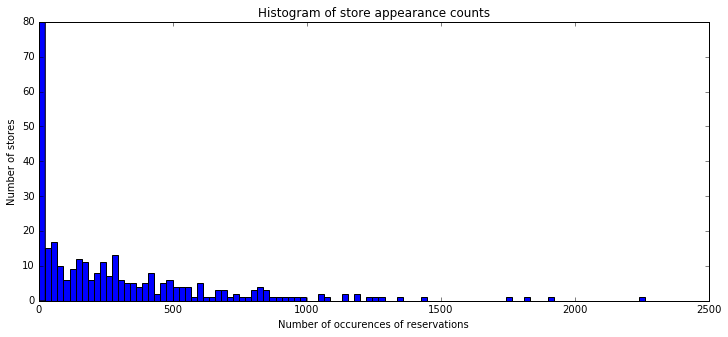

In [10]:
# Histogram of revervation times
plt.figure(figsize=(12, 5))
plt.hist(reservation['air_store_id'].value_counts(), bins=100)
plt.title('Histogram of store appearance counts')
plt.xlabel('Number of occurences of reservations')
plt.ylabel('Number of stores')
print()

# Check air_store_info dataset contents

In [11]:
storeinfo = pd.read_csv('./data/air_store_info.csv')
storeinfo.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


In [12]:
storeinfo.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


# Check air_visit_data dataset contents

In [13]:
visitors = pd.read_csv('./data/air_visit_data.csv')
visitors.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [14]:
visitors.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [15]:
visitors['air_store_id'].unique().shape

(829,)

In [16]:
visitors.tail()

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5


In [ ]:
# Processing store id and visit date
visitors['storeid'] = 0
visitors['date'] = 0
visit_uniq_store = [visitors['air_store_id'].unique()][0]
visit_uniq_date = [visitors['visit_date'].unique()][0]

for i in visitors['air_store_id']:
    visitors['storeid'] = loc[visitors['air_store_id']]
            

ValueError: x and y must be the same size

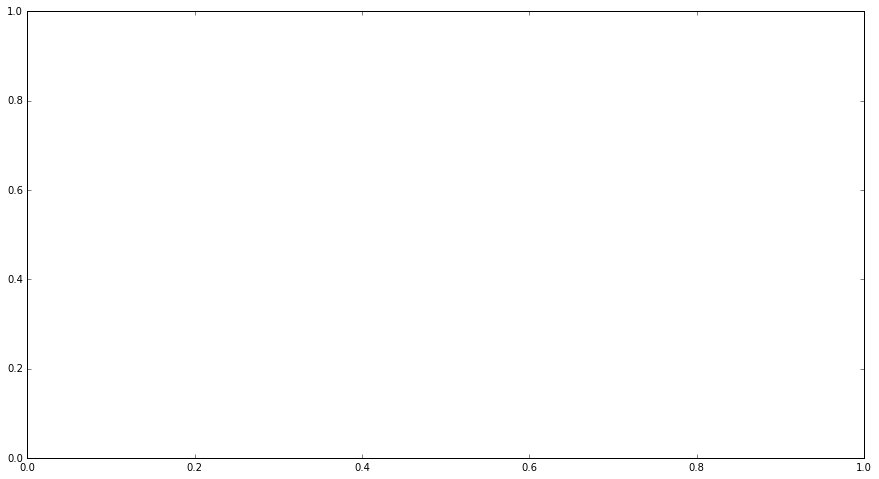

In [21]:
# Fixing random state for reproducibility
np.random.seed(19680801)

colors = np.random.rand(len(visitors['air_store_id']))

visit_uniq_store = [visitors['air_store_id'].unique()][0]
visit_uniq_date = [visitors['visit_date'].unique()][0]

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(visit_uniq_store,visit_uniq_date,s=visitors['visitors'],c=colors,alpha=0.5)
ax.set_xlabel('Air_Store_Id')
ax.set_ylabel('Visit_Data')
ax.legend(('Visitors'),scatterpoints=1,loc='upper right',fontsize=15,)

# Check date_info.csv dataset contents

In [96]:
dateinfo = pd.read_csv('./data/date_info.csv')
dateinfo.describe()

,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [97]:
dateinfo.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


# Check hpg_reserve.csv dataset contents

In [98]:
hpgres = pd.read_csv('./data/hpg_reserve.csv')
hpgres.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [99]:
hpgres.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


# Check hpg_store_info.csv dataset contents

In [100]:
hpgstore = pd.read_csv('./data/hpg_store_info.csv')
hpgstore.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


In [101]:
hpgstore.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


# Check store_id_relation.csv dataset contents

In [102]:
storeid = pd.read_csv('./data/store_id_relation.csv')
storeid.describe()

,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_627cabe2fe53f33f,hpg_9668001cf2b8dc74
freq,1,1


In [103]:
storeid.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [104]:
storeid.tail()

,air_store_id,hpg_store_id
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19
149,air_465bddfed3353b23,hpg_23c5945dc1a72454
